In [1]:
import nltk
import re
from collections import Counter
from itertools import islice
import matplotlib.pyplot as plt

In [2]:
import pickle

### load test corpus, ngram counters

In [31]:
test_corpus = []
with open('../data/test_v2-preprocessed.txt','rt') as file:
    for line in file:
        test_corpus.append(line.rstrip().split(' '))

# Pos-tag ngrams

In [4]:
nltk.download('averaged_perceptron_tagger')
import seaborn as sns

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\persi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\persi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
def plot_top_counter(counter, n=30):    
    top = counter.most_common(n)
    x, y = map(list,zip(*top))
    if not isinstance(x[0], str):
        x = list(map(repr, x))
    plt.figure(figsize=[15,15])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    sns.barplot(x=y,y=x)

In [6]:
def plot_top_pos_instances(tagged_ngrams_counter, pos, m=30):
    instances_counter = Counter()
    for tagged_ngram, count in tagged_ngrams_counter.items():
        ngram, tags = tagged_ngram
        if tags == pos:
            instances_counter.update({ngram:count})
    top = instances_counter.most_common(m)
    x, y = zip(*top)
    x, y = list(x),list(y)
    plt.figure(figsize=[10,10])
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.title(f'top instances for tags {pos}',fontsize=13)
    sns.barplot(x=y,y=x)

In [7]:
tagged_sentences = nltk.pos_tag_sents(test_corpus)

# UNIGRAMS

In [8]:
tagged_unigrams_counter = Counter()
for sentence in tagged_sentences:
    tagged_unigrams_counter.update(sentence)
    
unigram_tags_counter = Counter()
for uni_tag, count in tagged_unigrams_counter.items():
    _, tag = uni_tag
    unigram_tags_counter.update({tag : count})

### the most common POS

number of all unique UNIGRAM-TAG pair in test corpus: 227322
number of all unique unigram's tags in test corpus: 44


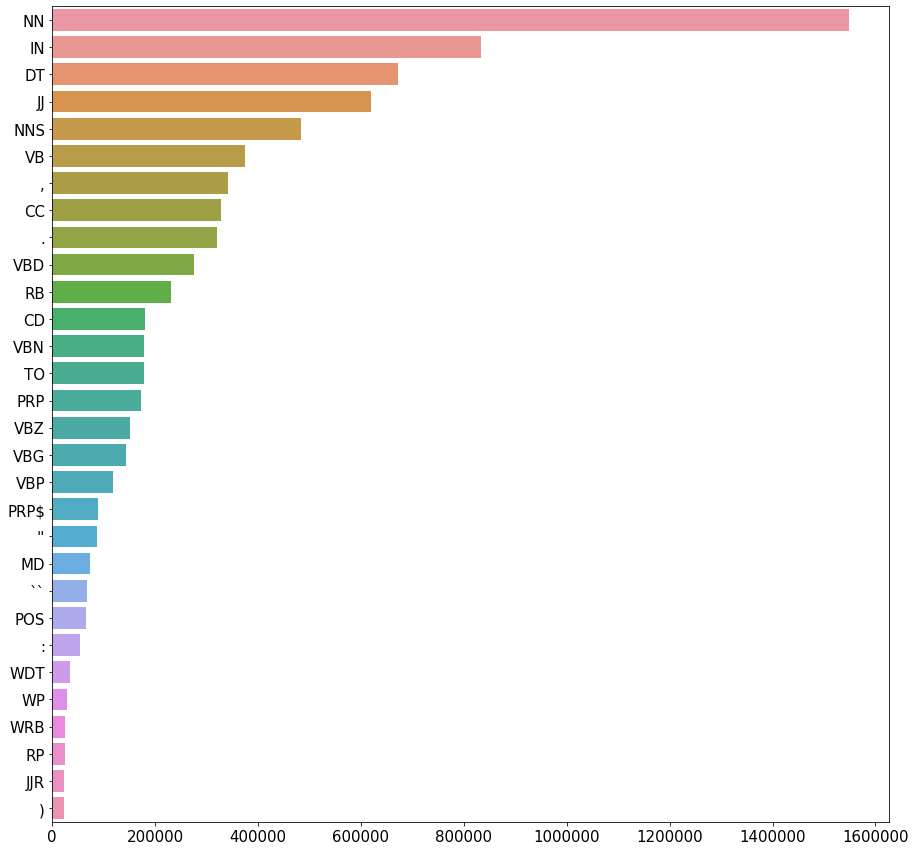

In [9]:
print(f"number of all unique UNIGRAM-TAG pair in test corpus: {len(tagged_unigrams_counter)}")
print(f"number of all unique unigram's tags in test corpus: {len(unigram_tags_counter)}")
plot_top_counter(unigram_tags_counter)

number of all unique UNIGRAM-TAG pair in test corpus: 227322
number of all unique unigram's tags in test corpus: 44


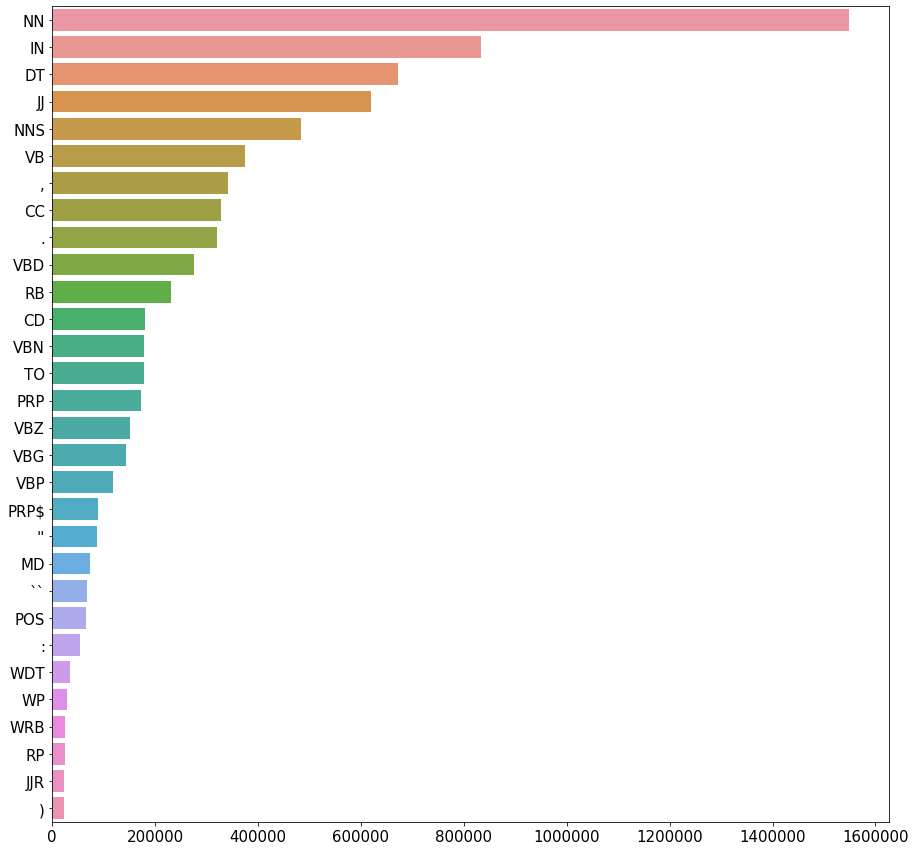

In [10]:
print(f"number of all unique UNIGRAM-TAG pair in test corpus: {len(tagged_unigrams_counter)}")
print(f"number of all unique unigram's tags in test corpus: {len(unigram_tags_counter)}")
plot_top_counter(unigram_tags_counter)

### the most common instances of individual POS

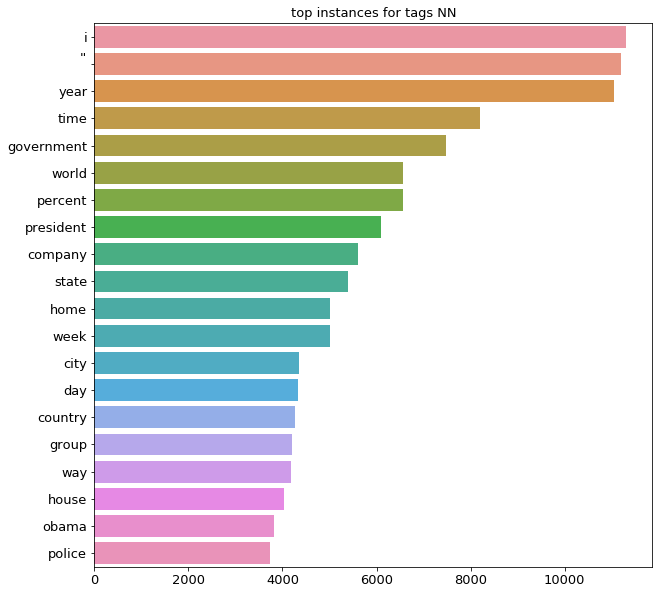

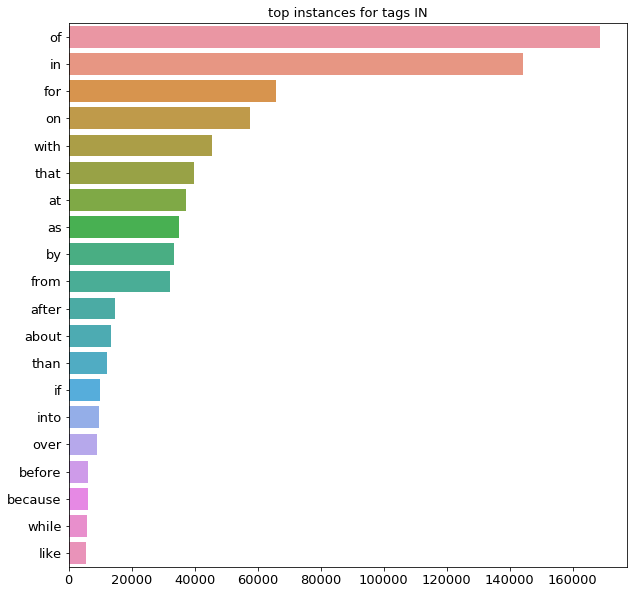

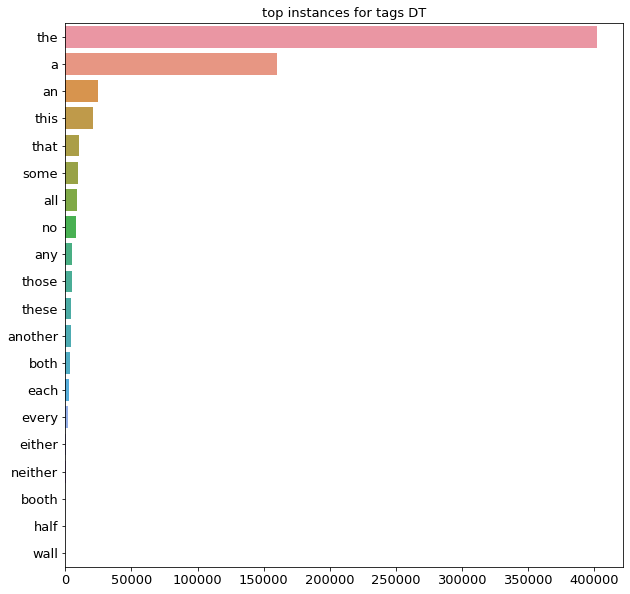

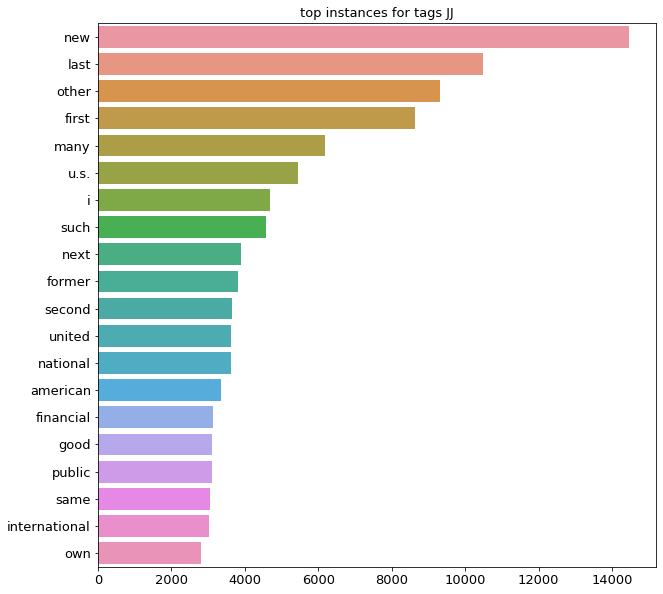

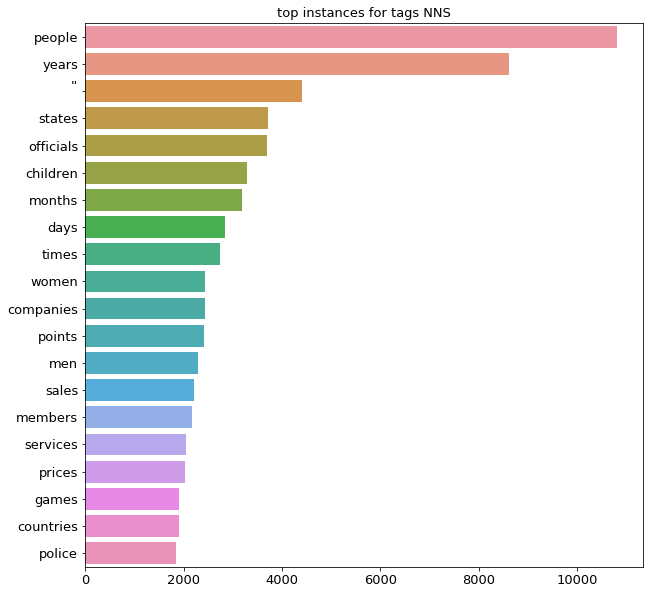

In [12]:
for tag, _ in unigram_tags_counter.most_common(5):
    plot_top_pos_instances(tagged_unigrams_counter, tag, 20)

# BIGRAMS

In [13]:
def get_ngrams_and_tags(sentence, ngram_tags, n):
    for i in range(len(sentence) - n + 1):
        ngram = tuple(sentence[i:i+n])
        if not (ngram in ngram_tags):
            _, ngram_tags[ngram] = zip(*nltk.pos_tag(ngram))
        yield ' '.join(ngram), ngram_tags[ngram]

In [34]:
bigram_tags = dict()
tagged_bigrams_counter = Counter()
for i, sentence in enumerate(test_corpus):
    print(f'working on {i} line', end='\r')
    tagged_bigrams_counter.update(get_ngrams_and_tags(sentence,bigram_tags,2))

In [36]:
with open('../data/bigram_tags_test_str.pickle', 'wb') as bigram_file1, \
    open('../data/tagged_bigrams_counter_test_str.pickle', 'wb') as bigram_file2:
    pickle.dump(bigram_tags, bigram_file1)
    pickle.dump(tagged_bigrams_counter, bigram_file2)
del bigram_tags

In [91]:
with open('../data/tagged_bigrams_counter_test_str.pickle', 'rb') as bigram_file:
    tagged_bigrams_counter = pickle.load(bigram_file)

In [38]:
bigram_tags_counter = Counter()
for tagged_bigram, count in tagged_bigrams_counter.items():
    _, tags = tagged_bigram
    bigram_tags_counter.update({tags : count})

### the most common pairs of POS

number of all unique BIGRAM-TAG pair in test corpus: 1881410
number of all unique bigram's tags in test corpus: 1263


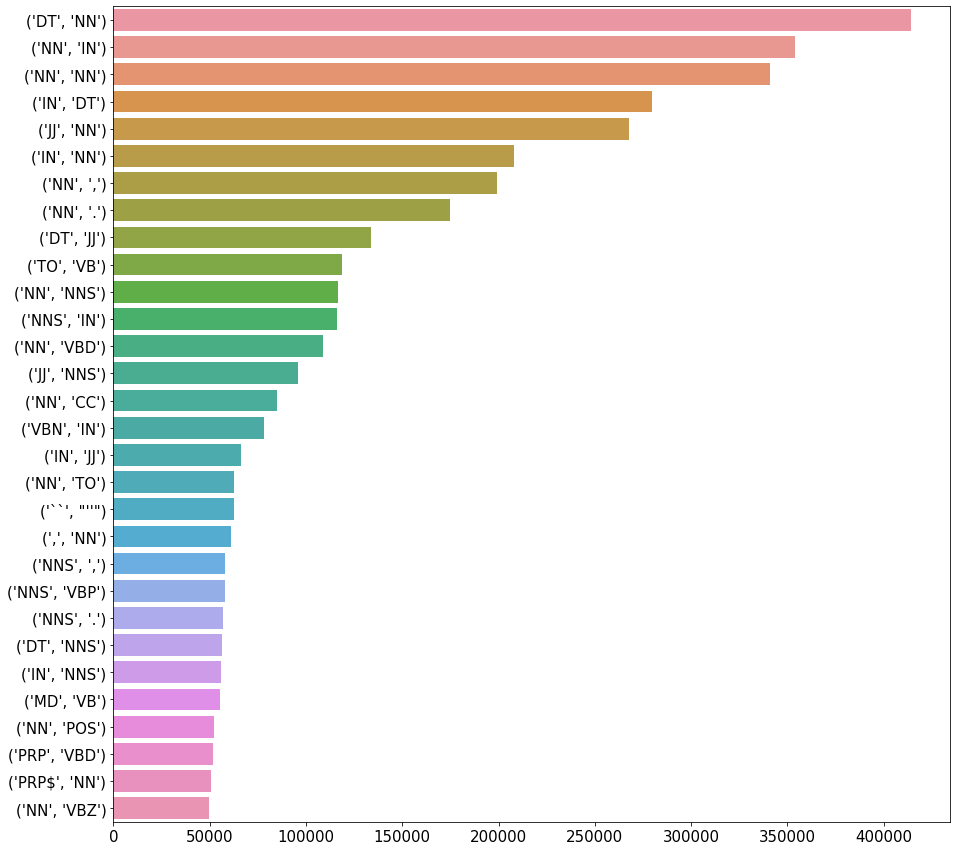

In [39]:
print(f"number of all unique BIGRAM-TAG pair in test corpus: {len(tagged_bigrams_counter)}")
print(f"number of all unique bigram's tags in test corpus: {len(bigram_tags_counter)}")
plot_top_counter(bigram_tags_counter)

### the most common instances of some pairs of POS

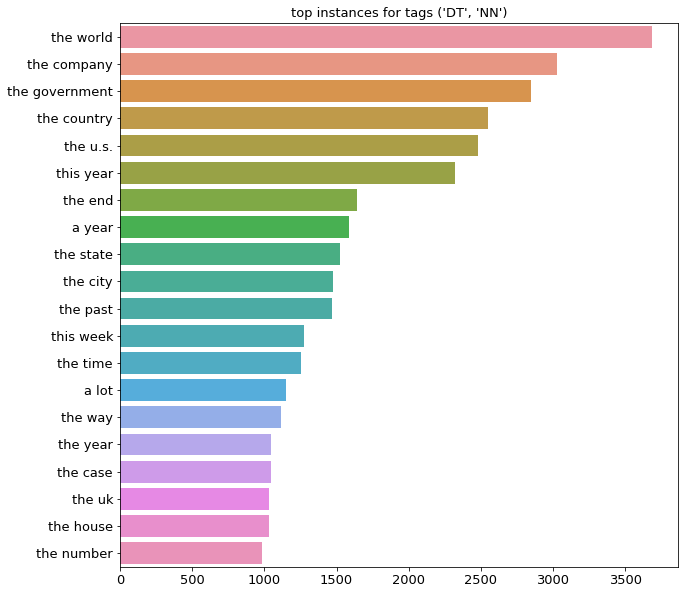

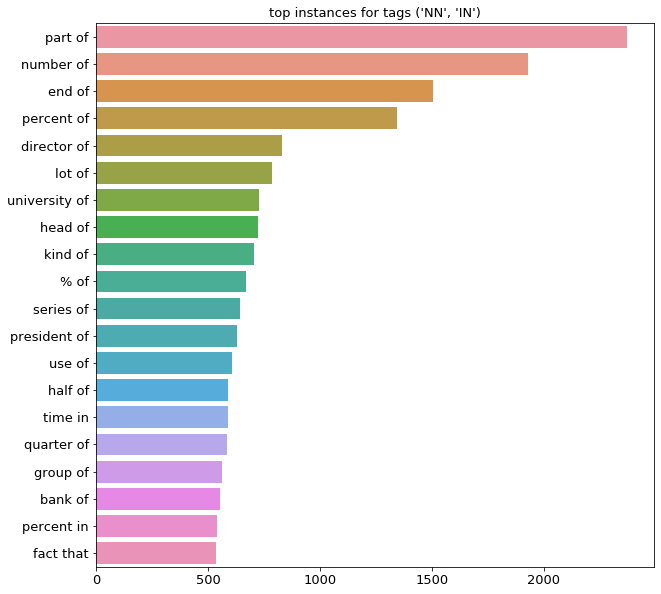

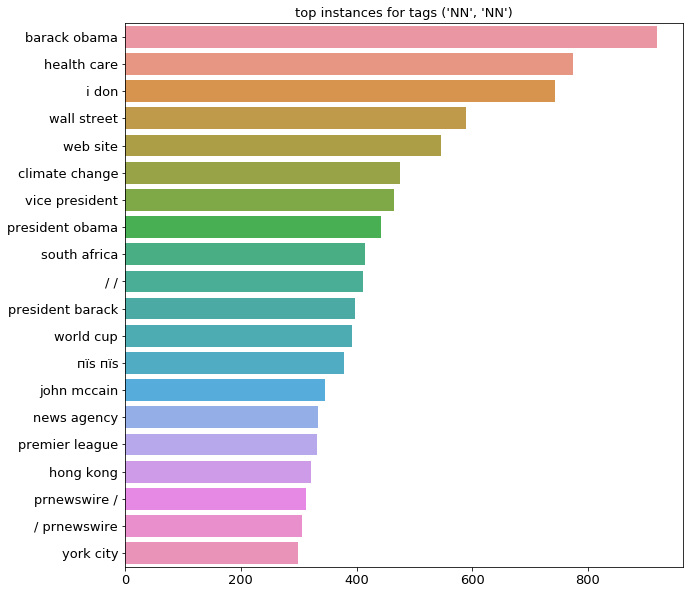

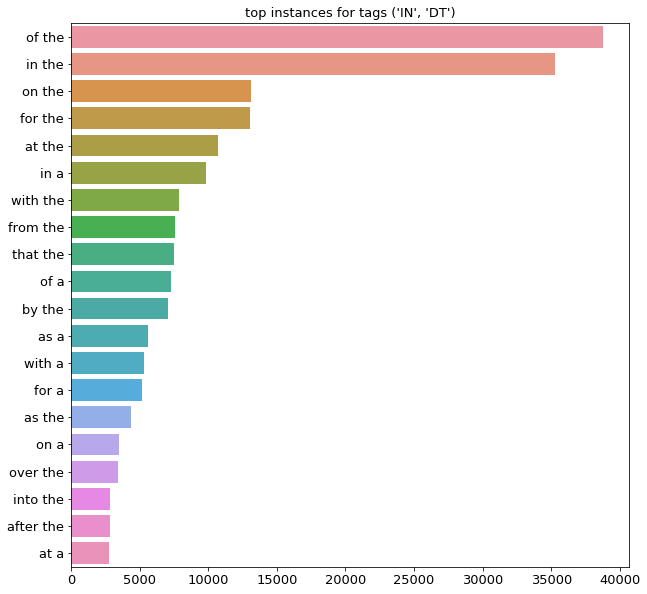

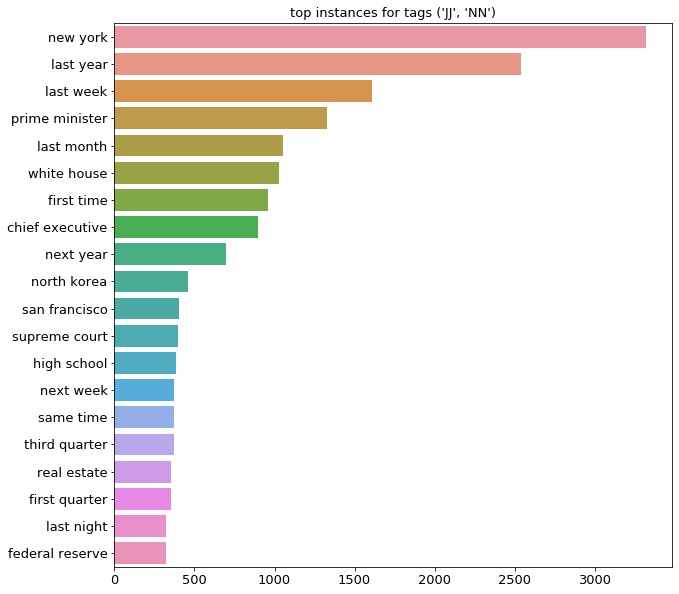

In [40]:
for tags, _ in bigram_tags_counter.most_common(5):
    plot_top_pos_instances(tagged_bigrams_counter, tags, 20)

# TRIGRAMS

In [41]:
# new
trigram_tags = dict()
tagged_trigrams_counter = Counter()
for i, sentence in enumerate(test_corpus):
    print(f'working on {i} line', end='\r')
    tagged_trigrams_counter.update(get_ngrams_and_tags(sentence,trigram_tags,3))

In [43]:
#new
trigram_tags_counter = Counter()
for tagged_trigram, count in tagged_trigrams_counter.items():
    _, tags = tagged_trigram
    trigram_tags_counter.update({tags:count})

In [44]:
#new
with open('../data/trigram_tags_test_str.pickle', 'wb') as trigram_file1, \
    open('../data/tagged_trigrams_counter_test_str.pickle', 'wb') as trigram_file2:
    pickle.dump(trigram_tags, trigram_file1)
    pickle.dump(tagged_trigrams_counter, trigram_file2)
del trigram_tags

### the most common triples of POS

number of all unique TRIGRAM-TAG pair in test corpus: 4594232
number of all unique trigram's tags in test corpus: 23468


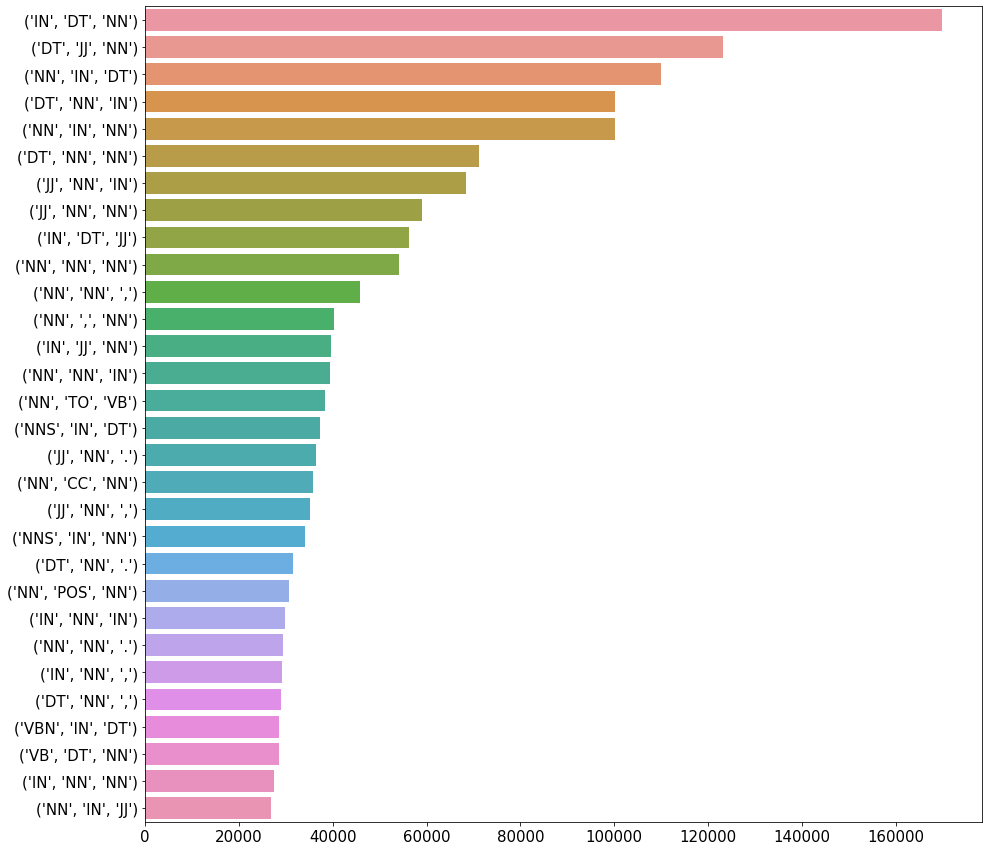

In [45]:
print(f"number of all unique TRIGRAM-TAG pair in test corpus: {len(tagged_trigrams_counter)}")
print(f"number of all unique trigram's tags in test corpus: {len(trigram_tags_counter)}")
plot_top_counter(trigram_tags_counter)

### the most common instances of some triples of POS

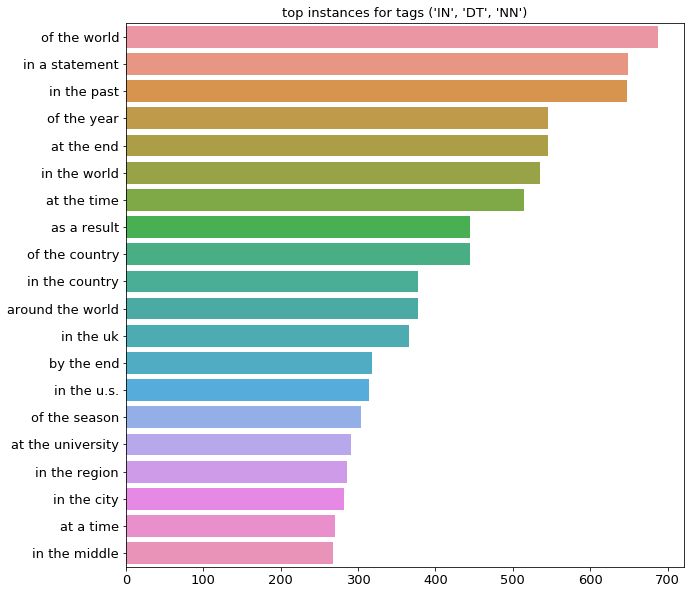

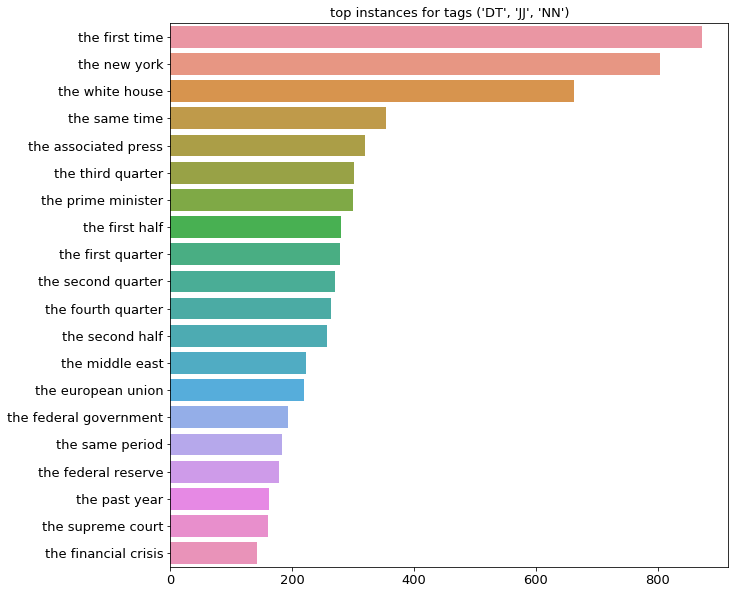

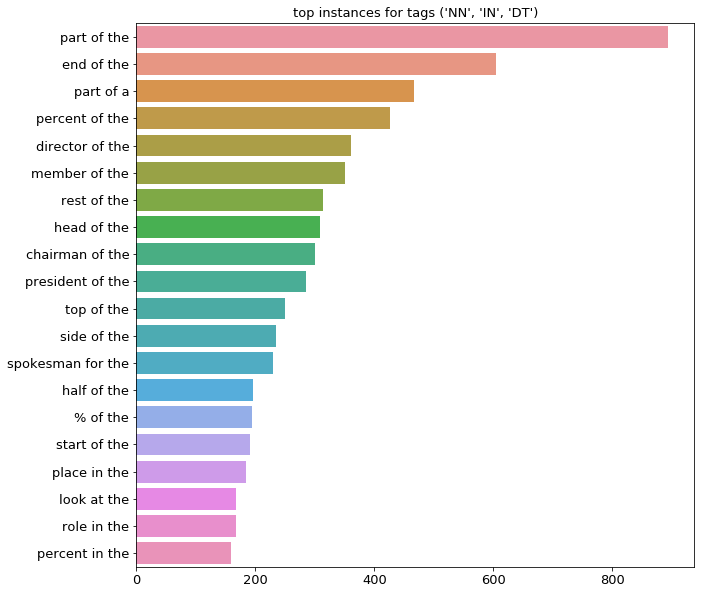

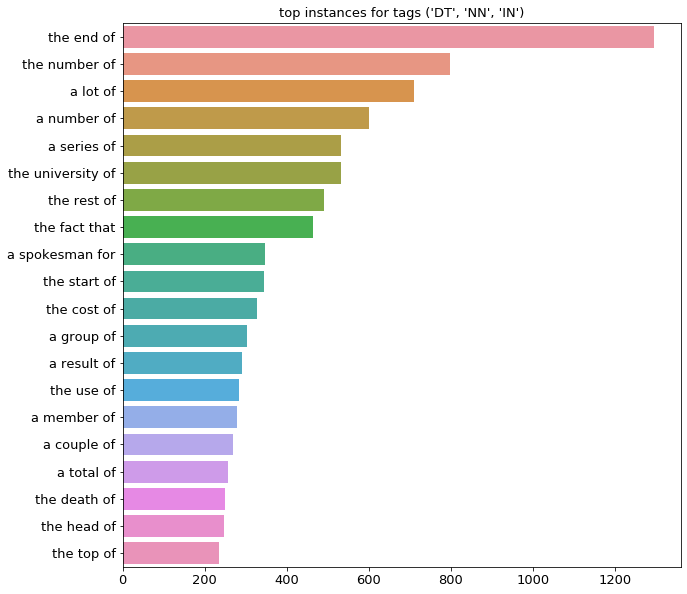

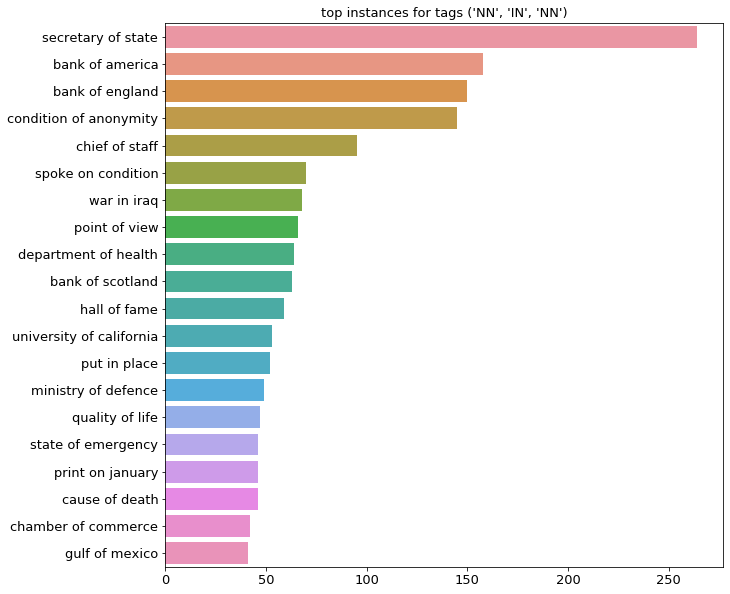

In [46]:
for tags, _ in trigram_tags_counter.most_common(5):
    plot_top_pos_instances(tagged_trigrams_counter, tags, 20)

In [47]:
with open('../data/tagged_unigrams_counter_test_str.pickle', 'wb') as unigram_file, \
        open('../data/tagged_bigrams_counter_test_str.pickle', 'wb') as bigram_file, \
        open('../data/tagged_trigrams_counter_test_str.pickle', 'wb') as trigram_file:
    pickle.dump(tagged_unigrams_counter, unigram_file)
    pickle.dump(tagged_bigrams_counter, bigram_file)
    pickle.dump(tagged_trigrams_counter, trigram_file)    